In [19]:
import math
import numpy as np

"""
cby 2010/03/31, hanasaki, NIES: H08 ver1.0
r0lat1, r0lat2 : latitude -90.0 (south pole) to 90.0 (north pole)
returns arealat : in m^2
by approximated equation

c       (p0lonmin,platmax)       (p0lonmax,platmax)
c         /                         /
c        /__________   ____________/
c        |       |       |         |
c        |(0,0)  |  ...  |(n0x,0)  |
c        |_______|__   __|_________|
c        |       |                 |
c           .     .
c           .       .
c           .         .
c        |_______|__   ____________|
c        |       |       |         |
c        |(0,n0y)|  ...  |(n0x,n0y)|
c        |_______|__   __|_________|
"""

def getlon(n0x, p0lonmin, p0lonmax, i0x, c0opt):
    if c0opt == 'east':
        rgetlon = p0lonmin + ((p0lonmax - p0lonmin)/float(n0x)) * (float(i0x) + 1.0)
    elif c0opt == 'west':
        rgetlon = p0lonmin + ((p0lonmax - p0lonmin)/float(n0x)) * (float(i0x) + 0.0)
    else:
        rgetlon = p0lonmin + ((p0lonmax - p0lonmin)/float(n0x)) * (float(i0x) + 0.5)
    return rgetlon

def getlat(n0y, p0latmin, p0lonmax, i0y, c0opt):
    if c0opt == 'south':
        rgetlat = p0latmax - ((p0latmax - p0latmin)/float(n0y)) * (float(i0y) + 1.0)
    elif c0opt == 'north':
        rgetlat = p0latmax - ((p0latmax - p0latmin)/float(n0y)) * (float(i0y) + 0.0)
    else:
        rgetlat = p0latmax - ((p0latmax - p0latmin)/float(n0y)) * (float(i0y) + 0.5)
    
    return rgetlat
    
def rgetara(r0lon1, r0lon2, r0lat1, r0lat2):
    """
    oki and kanae 1997 Journal of Japan society of Hydrology & Water resources
    """
    p0e2 = 0.006694470 # square of the eccentricity of the Earth ellipsoid
    p0rad = 6378137.0 # equatorial radius

    r0e = math.sqrt(p0e2)

    if -90.0 <= r0lat1 <= 90 or -90 <= r0lat2 <= 90:
        r0sin1 = math.sin(r0lat1 * math.pi / 180.0)
        r0sin2 = math.sin(r0lat2 * math.pi / 180.0)

        # meridian curvature radius
        r0fnc1 = r0sin1 * (1 + (r0e * r0sin1)**2 / 2.0)
        r0fnc2 = r0sin2 * (1 + (r0e * r0sin2)**2 / 2.0)
    
        rgetara = math.pi * p0rad**2 * ((1 - r0e**2) / 180.0) * (r0fnc1 - r0fnc2) * (r0lon2 - r0lon1)
            
    else:
        print(f"rgetara: latitude out of range")

    if rgetara < 0:
        rgetara = -1.0 * rgetara

    return  rgetara

def grdara(n0x, n0y, p0lonmin, p0lonmax, p0latmin, p0latmax):
    r2tmp = np.zeros((n0y, n0x))
    
    for i0y in range(n0y):
        for i0x in range(n0x):
            r0lon1 = getlon(n0x, p0lonmin, p0lonmax, i0x, 'east')
            r0lon2 = getlon(n0x, p0lonmin, p0lonmax, i0x, 'west')
            r0lat1 = getlat(n0y, p0latmin, p0latmax, i0y, 'north')
            r0lat2 = getlat(n0y, p0latmin, p0latmax, i0y, 'south')
            r2tmp[i0y, i0x] = rgetara(r0lon1, r0lon2, r0lat1, r0lat2)

    return r2tmp

def save_binary(filename, data):
    data.astype(np.float32).tofile(filename)

In [20]:
n0x = 43200
n0y = 21600
p0lonmin = -180
p0lonmax = 180
p0latmin = -90
p0latmax = 90
name = 'grdara.30s'
path = f"/mnt/c/Users/tsimk/Downloads/H08_20230612/map/dat/grd_ara_/{name}"
tmp = grdara(n0x, n0y, p0lonmin, p0lonmax, p0latmin, p0latmax)
save_binary(path, tmp)

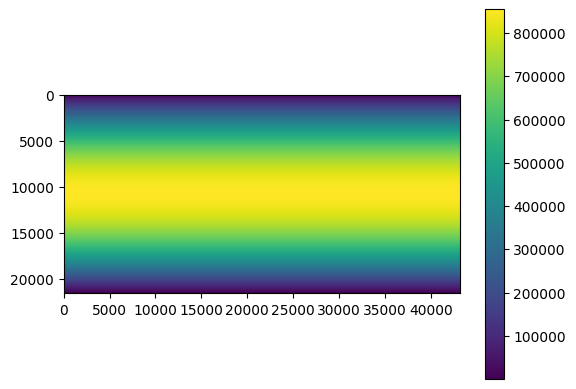

In [21]:
import matplotlib.pyplot as plt
plt.imshow(tmp)
plt.colorbar()